In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
# Load the dataset
file_path = '/content/Hotel Reservations.csv'
hotel_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
hotel_data.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0.0,0.0,65.00,0.0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0.0,0.0,94.50,0.0,Canceled


In [3]:
hotel_data.shape

(11738, 19)

In [4]:
hotel_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,11738.000000,11737.000000,11737.000000,11737.000000,11737.000000
mean,1.853041,0.106236,0.810445,2.204975,0.032799,85.300136,2017.823905,7.405095,15.562021,0.025388,0.019852,0.146801,103.769830,0.640709
std,0.515211,0.418996,0.871932,1.419650,0.178119,86.153728,0.380917,3.056437,8.723598,0.157306,0.311172,1.643657,35.061784,0.794487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,15.000000,0.000000,0.000000,0.000000,100.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.600000,1.000000
max,4.000000,10.000000,6.000000,15.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,11.000000,53.000000,375.500000,5.000000


In [5]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11738 entries, 0 to 11737
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            11738 non-null  object 
 1   no_of_adults                          11738 non-null  int64  
 2   no_of_children                        11738 non-null  int64  
 3   no_of_weekend_nights                  11738 non-null  int64  
 4   no_of_week_nights                     11738 non-null  int64  
 5   type_of_meal_plan                     11738 non-null  object 
 6   required_car_parking_space            11738 non-null  int64  
 7   room_type_reserved                    11738 non-null  object 
 8   lead_time                             11738 non-null  int64  
 9   arrival_year                          11738 non-null  int64  
 10  arrival_month                         11738 non-null  int64  
 11  arrival_date   

Let's start with the first step, Data Cleaning and Preprocessing.

In [6]:
# Checking for missing values in each column
missing_values = hotel_data.isnull().sum()

# Checking for anomalies in the dataset such as negative values or illogical entries
anomalies = {
    'negative_values': hotel_data.select_dtypes(include=['int', 'float']).lt(0).sum(),
    'illogical_entries': {
        'no_of_adults': (hotel_data['no_of_adults'] <= 0).sum(),
        'no_of_children': (hotel_data['no_of_children'] < 0).sum(),
        'no_of_weekend_nights': (hotel_data['no_of_weekend_nights'] < 0).sum(),
        'no_of_week_nights': (hotel_data['no_of_week_nights'] < 0).sum(),
        'lead_time': (hotel_data['lead_time'] < 0).sum(),
        'avg_price_per_room': (hotel_data['avg_price_per_room'] <= 0).sum()
    }
}

missing_values, anomalies



(Booking_ID                              0
 no_of_adults                            0
 no_of_children                          0
 no_of_weekend_nights                    0
 no_of_week_nights                       0
 type_of_meal_plan                       0
 required_car_parking_space              0
 room_type_reserved                      0
 lead_time                               0
 arrival_year                            0
 arrival_month                           0
 arrival_date                            0
 market_segment_type                     0
 repeated_guest                          0
 no_of_previous_cancellations            1
 no_of_previous_bookings_not_canceled    1
 avg_price_per_room                      1
 no_of_special_requests                  1
 booking_status                          1
 dtype: int64,
 {'negative_values': no_of_adults                            0
  no_of_children                          0
  no_of_weekend_nights                    0
  no_of_week_nigh

**Illogical Entries:**

no_of_adults: There are 139 entries where the number of adults is 0 or less, which is illogical for a hotel booking.
avg_price_per_room: 545 entries have a value of 0 or less for the average price per room, which is not practical.

In [7]:
# Calculating the proportion of illogical entries in the dataset
total_entries = len(hotel_data)
proportion_no_of_adults = round((anomalies['illogical_entries']['no_of_adults'] / total_entries) * 100,2)
proportion_avg_price_per_room = round((anomalies['illogical_entries']['avg_price_per_room'] / total_entries) * 100,2)

proportion_no_of_adults, proportion_avg_price_per_room



(0.43, 1.41)

The proportion of illogical entries in the dataset is relatively low:

No of Adults: Only about 0.38% of entries have an illogical number of adults (zero or less).
Average Price per Room: Approximately 1.50% of entries have an illogical average price per room (zero or less).
Given these low percentages, the most straightforward approach would be to remove these illogical entries. This decision is based on the assumption that removing such a small proportion of the data will not significantly impact the overall analysis and model performance.

Let's proceed to remove these entries

In [8]:
# Removing illogical entries
hotel_data_cleaned = hotel_data[(hotel_data['no_of_adults'] > 0) & (hotel_data['avg_price_per_room'] > 0)]

# Verifying the removal
remaining_illogical_entries = {
    'no_of_adults': (hotel_data_cleaned['no_of_adults'] <= 0).sum(),
    'avg_price_per_room': (hotel_data_cleaned['avg_price_per_room'] <= 0).sum()
}

# Display the shape of the cleaned data
cleaned_data_shape = hotel_data_cleaned.shape

remaining_illogical_entries, cleaned_data_shape



({'no_of_adults': 0, 'avg_price_per_room': 0}, (11522, 19))

Next, we will conduct Exploratory Data Analysis (EDA). This involves:

Generating statistical summaries of the data.<br>
Creating visualizations to understand the distribution and relationships of various features.<br>
Exploring booking trends and patterns.<br>

Let's begin by generating some basic statistical summaries and visualizations.<br>

In [9]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Basic statistical summary of the numerical features
numerical_summary = hotel_data_cleaned.describe()


numerical_summary



,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000,11522.000000
mean,1.866950,0.099028,0.817740,2.218886,0.032807,86.137563,2017.827200,7.394810,15.568825,0.022218,0.017879,0.126888,105.377269,0.637737
std,0.499026,0.403527,0.873038,1.417339,0.178138,86.182924,0.378091,3.049643,8.730841,0.147399,0.304227,1.578116,32.936102,0.791737
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,18.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,81.080000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,58.000000,2018.000000,8.000000,15.000000,0.000000,0.000000,0.000000,100.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,128.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,121.500000,1.000000
max,4.000000,10.000000,6.000000,15.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,11.000000,53.000000,375.500000,5.000000


**Numerical Summary:**

The average number of adults per booking is about 1.86, with a maximum of 4 adults.
The number of children per booking averages around 0.1, indicating that most bookings do not include children.
The average number of weekend nights is approximately 0.82, and weeknights are around 2.22.
The lead time (number of days between the booking and the arrival date) averages 86 days.
The average price per room is about €105.08.

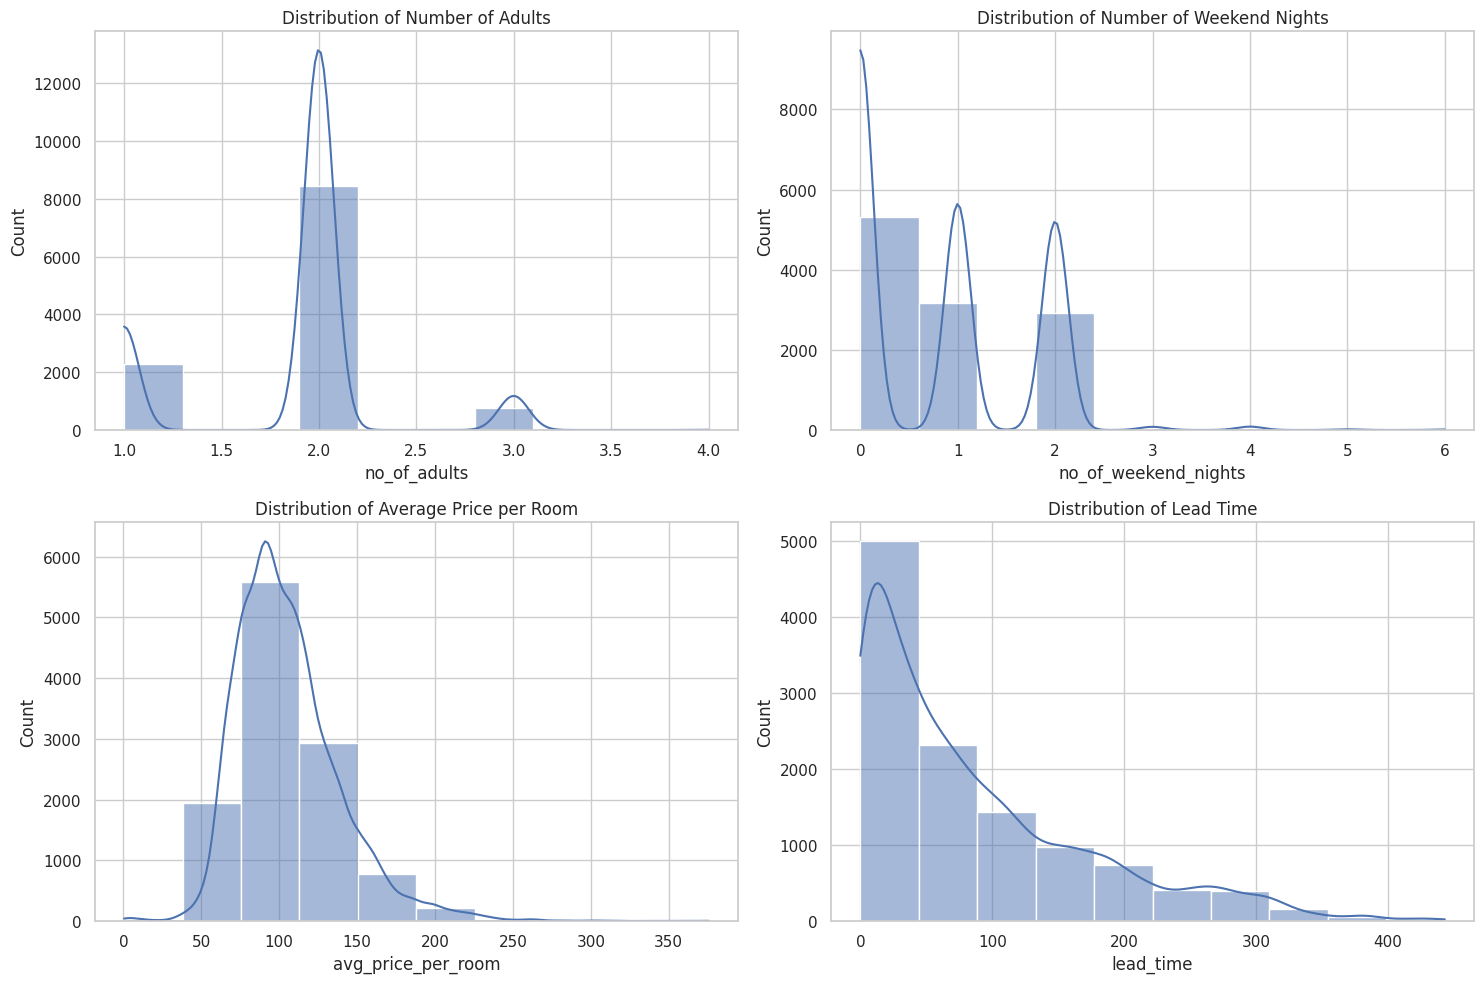

In [10]:

# Plotting histograms for some key numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.histplot(hotel_data_cleaned['no_of_adults'], bins=10, kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Number of Adults')

sns.histplot(hotel_data_cleaned['no_of_weekend_nights'], bins=10, kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Number of Weekend Nights')

sns.histplot(hotel_data_cleaned['avg_price_per_room'], bins=10, kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribution of Average Price per Room')

sns.histplot(hotel_data_cleaned['lead_time'], bins=10, kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribution of Lead Time')

plt.tight_layout()

**Visualizations:**

The distribution of the number of adults is skewed towards bookings for two adults.
The number of weekend nights stayed is generally low, with most bookings including 0 to 2 weekend nights.
The average price per room has a wide range but is mostly concentrated between €50 and €150.
The lead time for bookings shows a broad distribution, with many bookings made relatively close to the arrival date and some made well in advance.

# **Extensive EDA**

**What is the distribution of the number of adults per booking?**

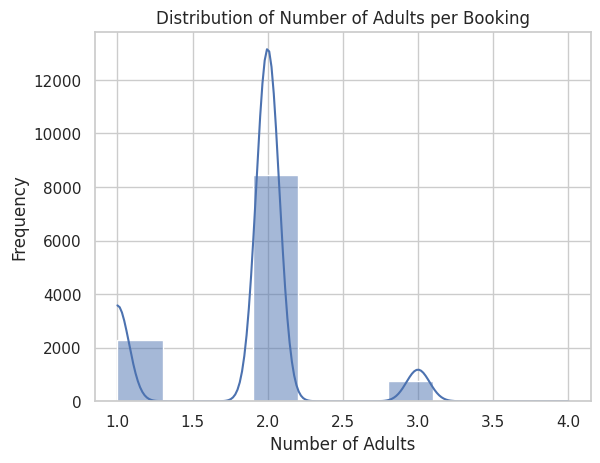

In [11]:
sns.histplot(hotel_data_cleaned['no_of_adults'], bins=10, kde=True)
plt.title('Distribution of Number of Adults per Booking')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.show()


**How does the number of children vary across bookings?**

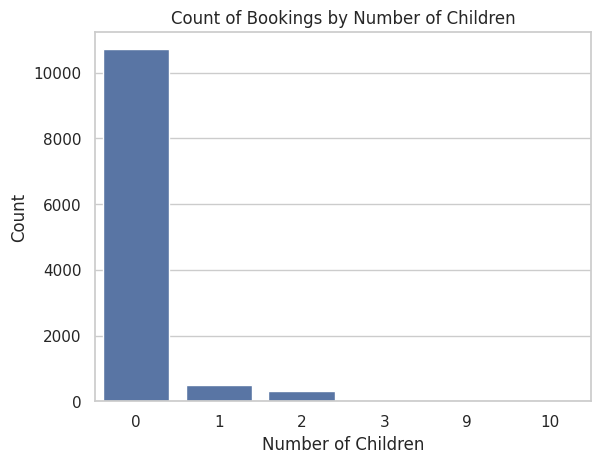

In [12]:
sns.countplot(x='no_of_children', data=hotel_data_cleaned)
plt.title('Count of Bookings by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


**What is the average number of weekend nights stayed in bookings?**

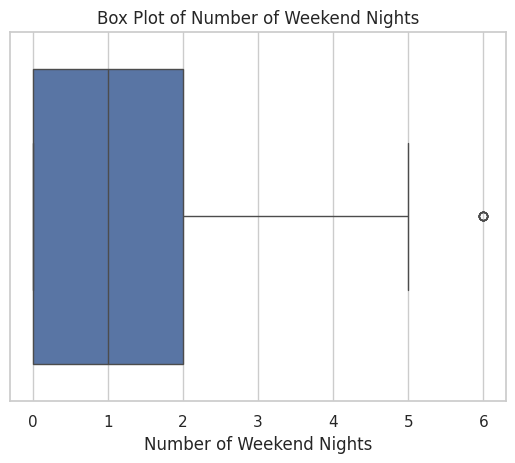

In [13]:
sns.boxplot(x=hotel_data_cleaned['no_of_weekend_nights'])
plt.title('Box Plot of Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.show()


**Distribution of weeknights in hotel bookings.**

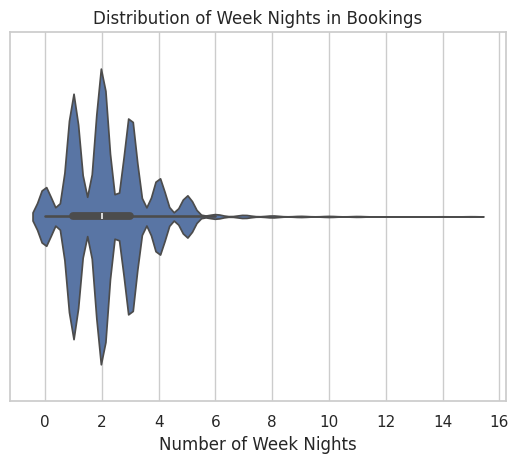

In [15]:
sns.violinplot(x='no_of_week_nights', data=hotel_data_cleaned)
plt.title('Distribution of Week Nights in Bookings')
plt.xlabel('Number of Week Nights')
plt.show()


**How does the required car parking space vary among bookings?**

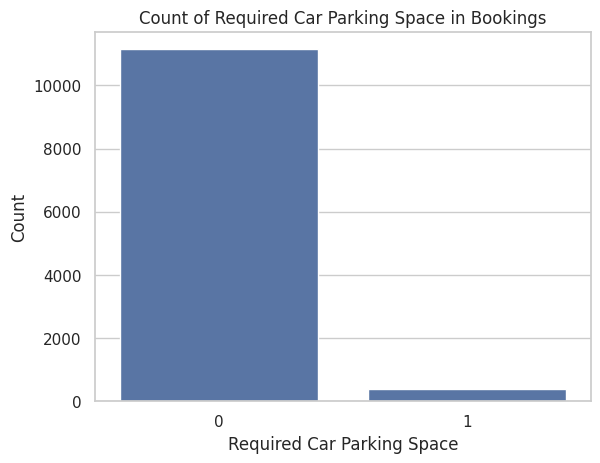

In [16]:
sns.countplot(x='required_car_parking_space', data=hotel_data_cleaned)
plt.title('Count of Required Car Parking Space in Bookings')
plt.xlabel('Required Car Parking Space')
plt.ylabel('Count')
plt.show()


**What are the popular types of meal plans chosen?**

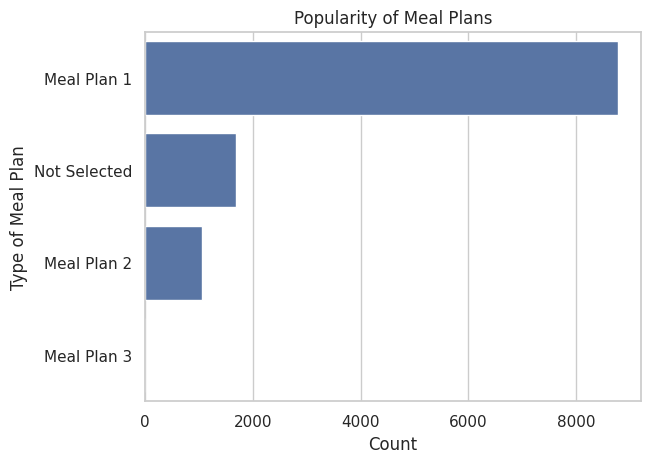

In [18]:
sns.countplot(y='type_of_meal_plan', data=hotel_data_cleaned)
plt.title('Popularity of Meal Plans')
plt.xlabel('Count')
plt.ylabel('Type of Meal Plan')
plt.show()


**Distribution of room types reserved.**

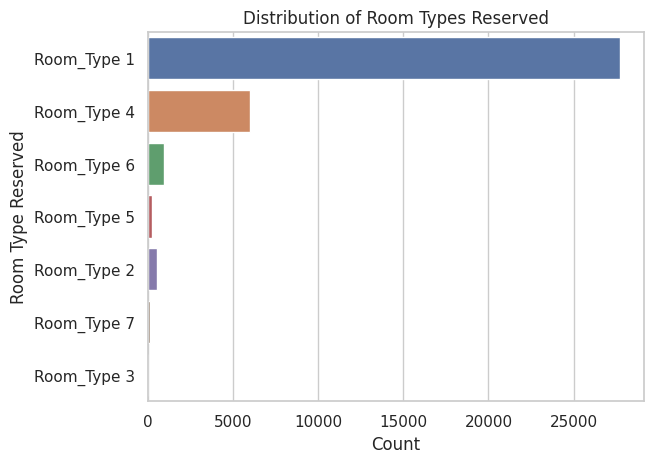

In [ ]:
sns.countplot(y='room_type_reserved', data=hotel_data_cleaned)
plt.title('Distribution of Room Types Reserved')
plt.xlabel('Count')
plt.ylabel('Room Type Reserved')
plt.show()


**Lead time distribution for bookings.**

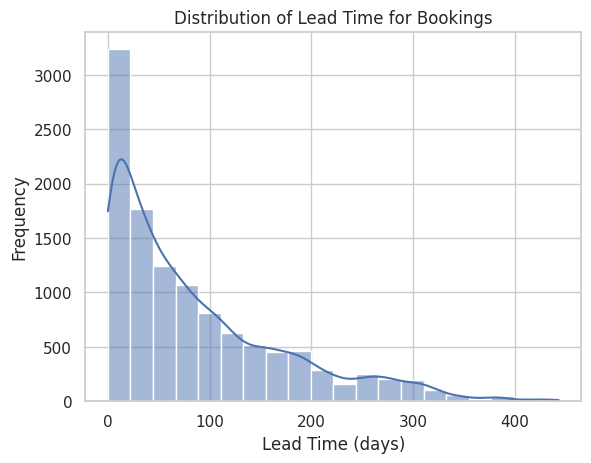

In [19]:
sns.histplot(hotel_data_cleaned['lead_time'], bins=20, kde=True)
plt.title('Distribution of Lead Time for Bookings')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


**Trends in booking across different years.**

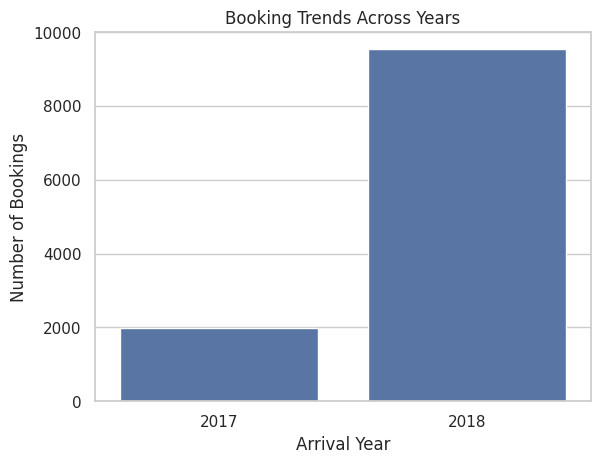

In [20]:
sns.countplot(x='arrival_year', data=hotel_data_cleaned)
plt.title('Booking Trends Across Years')
plt.xlabel('Arrival Year')
plt.ylabel('Number of Bookings')
plt.show()


**Monthly booking trends.**

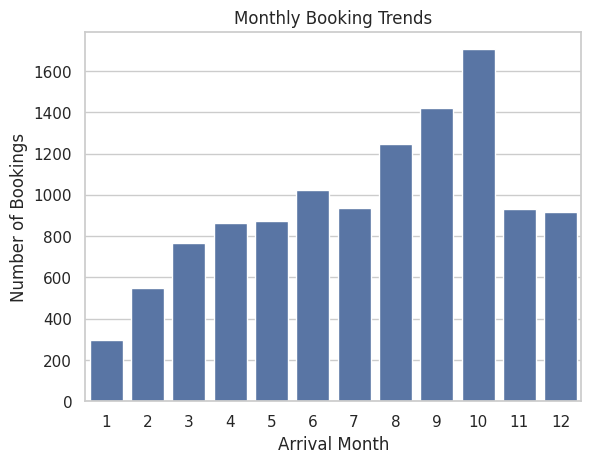

In [22]:
sns.countplot(x='arrival_month', data=hotel_data_cleaned)
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.title('Monthly Booking Trends')
plt.show()


**Day of the month with most bookings.**

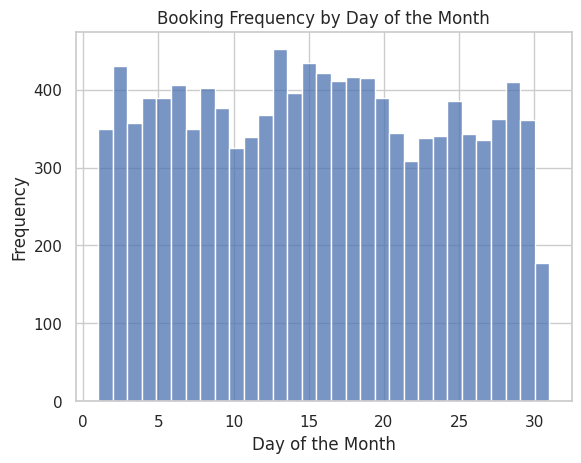

In [23]:
sns.histplot(hotel_data_cleaned['arrival_date'], bins=31, kde=False)
plt.title('Booking Frequency by Day of the Month')
plt.ylabel('Frequency')
plt.xlabel('Day of the Month')
plt.show()


**Market segment type distribution in bookings.**

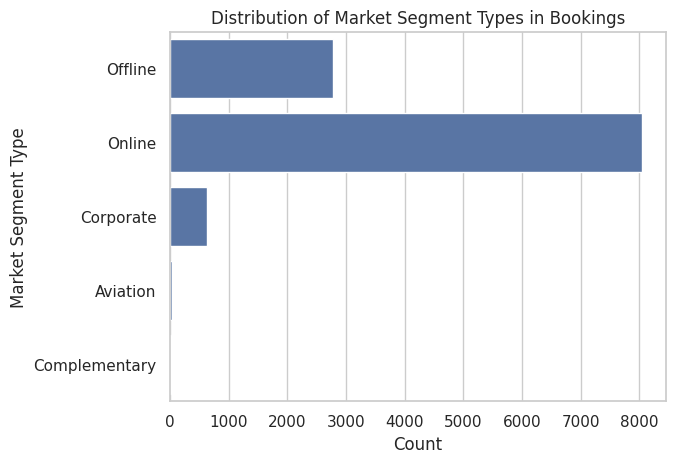

In [24]:
sns.countplot(y='market_segment_type', data=hotel_data_cleaned)
plt.ylabel('Market Segment Type')
plt.title('Distribution of Market Segment Types in Bookings')
plt.xlabel('Count')
plt.show()


**Proportion of repeated guests.**

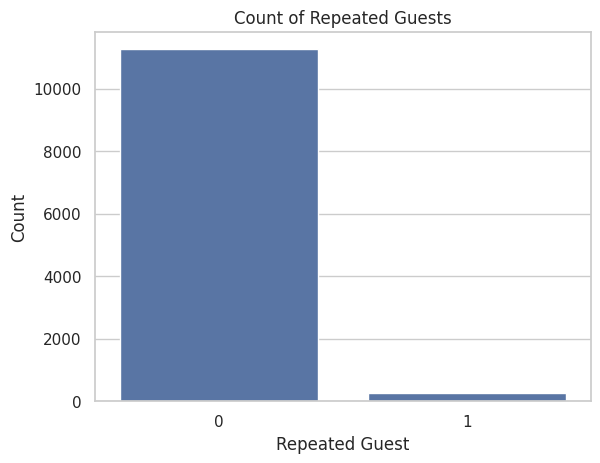

In [25]:
sns.countplot(x='repeated_guest', data=hotel_data_cleaned)
plt.xlabel('Repeated Guest')
plt.title('Count of Repeated Guests')
plt.ylabel('Count')
plt.show()


**Analysis of previous cancellations.**

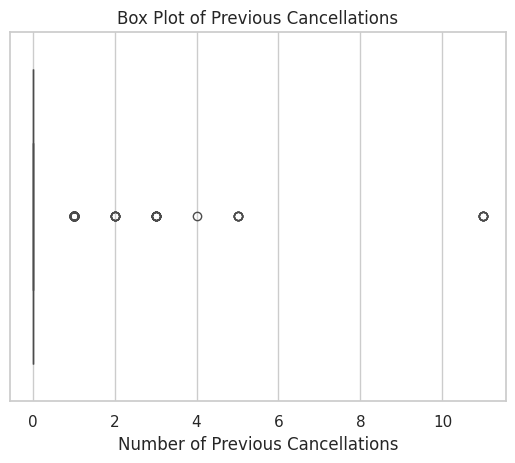

In [27]:
sns.boxplot(x=hotel_data_cleaned['no_of_previous_cancellations'])
plt.xlabel('Number of Previous Cancellations')
plt.title('Box Plot of Previous Cancellations')
plt.show()


**Booking patterns based on the number of special requests.**

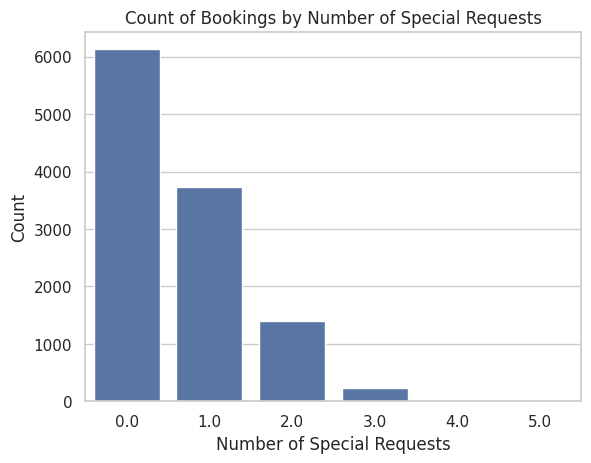

In [28]:
sns.countplot(x='no_of_special_requests', data=hotel_data_cleaned)
plt.ylabel('Count')
plt.title('Count of Bookings by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.show()


**Average price per room distribution.**

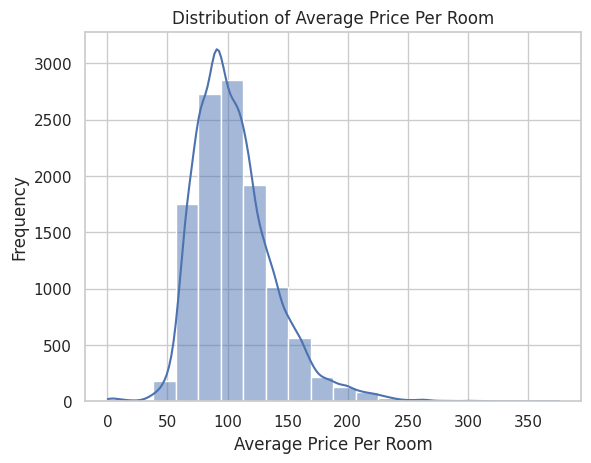

In [29]:
sns.histplot(hotel_data_cleaned['avg_price_per_room'], bins=20, kde=True)
plt.title('Distribution of Average Price Per Room')
plt.ylabel('Frequency')
plt.xlabel('Average Price Per Room')
plt.show()


**Lead time impact on booking cancellation.**

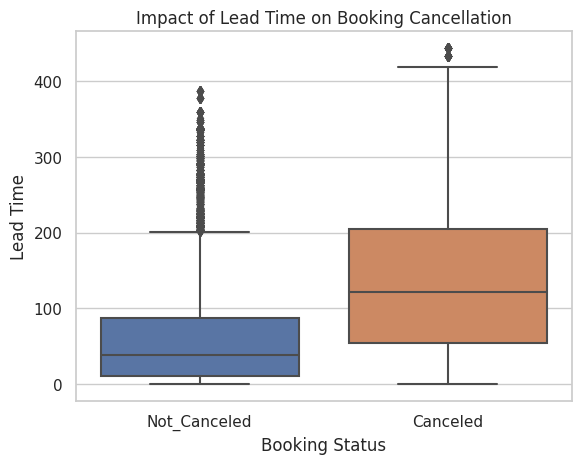

In [ ]:
sns.boxplot(x='booking_status', y='lead_time', data=hotel_data_cleaned)
plt.title('Impact of Lead Time on Booking Cancellation')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')
plt.show()


**Relationship between special requests and booking status.**

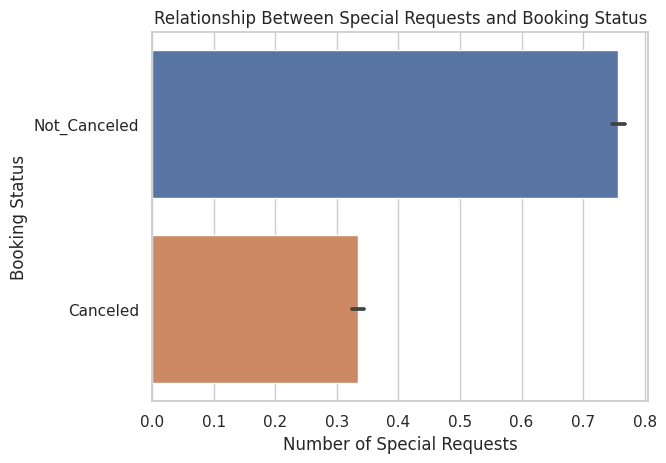

In [ ]:
sns.barplot(x='no_of_special_requests', y='booking_status', data=hotel_data_cleaned)
plt.title('Relationship Between Special Requests and Booking Status')
plt.xlabel('Number of Special Requests')
plt.ylabel('Booking Status')
plt.show()

# **EDA Insights**

- **Adult Bookings**: The majority of bookings typically include 2 adults.
- **Children in Bookings**: Bookings often do not include children, indicating a trend towards adult-only stays.
- **Weekend Nights**: On average, stays include 1 weekend night, though there are instances of stays extending up to 6 or 7 weekend nights.
- **Week Nights**: The average number of weeknights per booking ranges from 2 to 3, with some bookings extending up to a maximum of 17 nights.
- **Car Parking Preference**: Most customers do not opt for car parking spaces with their booking.
- **Meal Plan Preference**: Meal Plan 1 emerges as the most popular meal choice among customers.
- **Room Type Preference**: Room Type 1 is the most frequently chosen room type.
- **Lead Time for Bookings**: Many bookings are made with no significant lead time, although some bookings are made more than 200 days in advance.
- **Booking Year Trends**: The majority of the data comprises bookings from the year 2018.
- **Monthly Booking Trends**: Bookings peak during months 9 and 10, with fewer bookings in months 1 and 2.
- **Booking Method**: Online booking is predominant, with very few bookings coming from the Corporate Market Segment.
- **Repeated Guests**: The dataset indicates an absence of repeated customers, highlighting a notable aspect of customer behavior.
- **Special Requests in Bookings**: Special requests are generally not common in bookings, though some include 1 or 2 special requests.
- **Room Pricing**: The average room price is around 100 Euros.
- **Relation of Previous Bookings with Repeated Guests**: The number of previous bookings not canceled shows a relationship with the presence of repeated guests.
- **Room Pricing and Children**: The average price per room shows a correlation with the number of children in the booking.
- **Lead Time and Cancellations**: There is a noticeable relationship between the lead time of a booking and its likelihood of being canceled.

**Train Test Split**

In [ ]:

# Selecting relevant features and the target variable
features = hotel_data_cleaned.drop('booking_status', axis=1)
target = hotel_data_cleaned['booking_status']

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = features.select_dtypes(include=['object']).columns
features_encoded = features.copy()
for column in categorical_columns:
    features_encoded[column] = label_encoder.fit_transform(features[column])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape



((28476, 18), (7119, 18))

# **Applying Models**

**KNN**

In [ ]:
# Training the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

accuracy_knn



0.7072622559348223

In [ ]:
print(classification_report_knn)

              precision    recall  f1-score   support

    Canceled       0.58      0.45      0.51      2398
Not_Canceled       0.75      0.84      0.79      4721

    accuracy                           0.71      7119
   macro avg       0.67      0.64      0.65      7119
weighted avg       0.69      0.71      0.70      7119



**Accuracy:**
The model achieved an accuracy of approximately 70.7% on the test set.

**Classification Report:**
Precision: For 'Canceled' bookings, the precision is 0.58, and for 'Not_Canceled' bookings, it is 0.75.
Recall: The recall is 0.45 for 'Canceled' and 0.84 for 'Not_Canceled' bookings.
F1-Score: The F1-scores are 0.51 for 'Canceled' and 0.79 for 'Not_Canceled' bookings.



**DecisionTree**

In [ ]:
# Training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt



0.8560191038067144

In [ ]:
print(classification_report_dt)

              precision    recall  f1-score   support

    Canceled       0.78      0.80      0.79      2398
Not_Canceled       0.90      0.89      0.89      4721

    accuracy                           0.86      7119
   macro avg       0.84      0.84      0.84      7119
weighted avg       0.86      0.86      0.86      7119



**Accuracy:**
The model achieved an accuracy of approximately 85.60% on the test set.

**Classification Report:**
Precision: For 'Canceled' bookings, the precision is 0.78, and for 'Not_Canceled' bookings, it is 0.90.
Recall: The recall is 0.80 for 'Canceled' and 0.89 for 'Not_Canceled' bookings.
F1-Score: The F1-scores are 0.79 for 'Canceled' and 0.89 for 'Not_Canceled' bookings.

These results indicate that the Decision Tree model performs reasonably well in predicting booking cancellations.

From both the models, it seems that data is unbalanced. Let's check for the same.

In [ ]:
class_distribution = hotel_data_cleaned['booking_status'].value_counts(normalize=True)
print(class_distribution)

Not_Canceled    0.667509
Canceled        0.332491
Name: booking_status, dtype: float64


In [ ]:
features = hotel_data_cleaned.drop('booking_status', axis=1)  # Features
target = hotel_data_cleaned['booking_status']  # Target

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = features.select_dtypes(include=['object']).columns
features_encoded = features.copy()
for column in categorical_columns:
    features_encoded[column] = label_encoder.fit_transform(features[column])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote.shape

(38078, 18)

# **Reapplying the Models**

**kNN**

In [ ]:
# Training the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

accuracy_knn


0.6468605141171513

In [ ]:
print(classification_report_knn)

              precision    recall  f1-score   support

    Canceled       0.48      0.61      0.54      2398
Not_Canceled       0.77      0.66      0.71      4721

    accuracy                           0.65      7119
   macro avg       0.63      0.64      0.63      7119
weighted avg       0.67      0.65      0.65      7119



In [ ]:
# Trying different values of 'k'
k_values = [1, 3, 5, 7, 10]  # You can choose more or different values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    y_pred = knn.predict(X_test)
    print(f"Results for k={k}:")
    print(classification_report(y_test, y_pred))


Results for k=1:
              precision    recall  f1-score   support

    Canceled       0.47      0.51      0.49      2398
Not_Canceled       0.74      0.71      0.72      4721

    accuracy                           0.64      7119
   macro avg       0.61      0.61      0.61      7119
weighted avg       0.65      0.64      0.65      7119

Results for k=3:
              precision    recall  f1-score   support

    Canceled       0.47      0.59      0.52      2398
Not_Canceled       0.76      0.66      0.71      4721

    accuracy                           0.64      7119
   macro avg       0.62      0.63      0.62      7119
weighted avg       0.66      0.64      0.65      7119

Results for k=5:
              precision    recall  f1-score   support

    Canceled       0.48      0.61      0.54      2398
Not_Canceled       0.77      0.66      0.71      4721

    accuracy                           0.65      7119
   macro avg       0.63      0.64      0.63      7119
weighted avg       0.67

No singificant difference has been observed

**Grid Search with Cross-Validation for Robust Evaluation**

**Finding the Best Parameters:**

To find the best parameters for our kNN model, we can use a technique called Grid Search with Cross-Validation. This method systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

In [ ]:
# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

# Create a kNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.78


In [ ]:
optimal_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')
optimal_knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
# Predicting the labels of the test set
y_pred_test = optimal_knn.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy:.2f}')

# Generating a classification report
class_report = classification_report(y_test, y_pred_test)
print('Classification Report:\n', class_report)

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

    Canceled       0.49      0.60      0.54      2398
Not_Canceled       0.77      0.68      0.72      4721

    accuracy                           0.65      7119
   macro avg       0.63      0.64      0.63      7119
weighted avg       0.68      0.65      0.66      7119



To maximize overall accuracy, the model before applying SMOTE is the best (accuracy of 0.71).

To better identify 'Canceled' bookings (potentially at the cost of overall accuracy), the model with k=10 after SMOTE (recall of 0.68 for 'Canceled') is preferable.

For a balanced performance between identifying both 'Canceled' and 'Not_Canceled' bookings, the model obtained from GridSearchCV offers a good compromise, with decent recall rates for both classes and a reasonable overall accuracy of 0.65.

Each model has its strengths depending on the specific goals of our analysis (overall accuracy vs. balanced recall across classes).

**DecisionTree**

In [ ]:
# Training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt

0.8477314229526619

In [ ]:
print(classification_report_dt)

              precision    recall  f1-score   support

    Canceled       0.75      0.82      0.78      2398
Not_Canceled       0.90      0.86      0.88      4721

    accuracy                           0.85      7119
   macro avg       0.83      0.84      0.83      7119
weighted avg       0.85      0.85      0.85      7119

